## 0. Import Modules and Data

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader.data as web
import datetime as dt

In [2]:
import Portfolio as port # This is from the Portfolio.py file with the different classes defined

## 1. Set-up Portfolio Strategy

In [282]:
# Define start date and end date

start_date = '2015-01-01'

end_date = '2020-01-05'

In [283]:
# Define Shares

# Provide the name of the ticker and type (Equity or Bond)

#VOO and BND are Vanguard ETFs which are proxies for individual stocks/bonds

voo = port.Share('VOO', 'Equity', start_date,end_date)
bnd = port.Share('BND', 'Bond', start_date, end_date)

In [284]:
voo.get_value('2019-01-01')

229.99

In [285]:
voo.get_value('2019-10-31')

278.55

In [286]:
# Need a way to group the different shares together

shares_list = [voo, bnd]

shares_dict = {}

for share in shares_list:
    shares_dict[share] = share.type


In [287]:
shares_dict

{<Portfolio.Share at 0x7f5910a02c88>: 'Equity',
 <Portfolio.Share at 0x7f5910a02cc0>: 'Bond'}

In [314]:
# Define Strategy

# Provide the equity distribution, the bond distriubtion, cash distribution, and the threshold
strat = port.Strategy(50,50,0,1)

In [315]:
# Run portfolio with set start and end dates

portfolio = port.Portfolio(shares_dict)

portfolio.initial_buy(500, strat, start_date)

In [316]:
portfolio.get_asset_values(start_date)

In [317]:
portfolio.asset_split

{'Equities': 50.0, 'Bonds': 50.0, 'Cash': 0.0}

In [318]:
# Run the portfolio over a series of months

time_period = pd.date_range(pd.to_datetime(start_date),pd.to_datetime(end_date))

for day in time_period:
    portfolio.reinvest_divs(day)
    portfolio.get_asset_values(day)
    if portfolio.asset_split['Equities'] > strat.equity_distribution+strat.threshold:
        sell_amt = (portfolio.asset_values['Equities']+portfolio.asset_values['Bonds'])*((portfolio.asset_split['Equities']-strat.equity_distribution)/100)
        sell_amt_per = sell_amt/len(portfolio.equities)
        for share in portfolio.equities: # sell equities and buy more bonds
            portfolio.sell(share, sell_amt_per, day)
        for share in portfolio.bonds:
            portfolio.buy(share, sell_amt_per, day)
               
    if portfolio.asset_split['Bonds'] > strat.bond_distribution+strat.threshold:
        sell_amt = (portfolio.asset_values['Equities']+portfolio.asset_values['Bonds'])*(portfolio.asset_split['Bonds']-strat.bond_distribution)
        sell_amt_per = sell_amt/len(portfolio.bonds)
        for share in portfolio.bonds: # sell bonds and buy more equities
            portfolio.sell(share, sell_amt_per, day)
        for share in portfolio.bonds:
            portfolio.buy(share, sell_amt_per, day)
        
    

In [319]:
# Create a dataframe with the historical data

portfolio_history = portfolio.get_hist_df()
portfolio_history['Date'] = pd.to_datetime(portfolio_history['Date']) # Convert date to datetime object
portfolio_history.set_index('Date', inplace = True)
portfolio_history.tail()

,Total Value,Equities,Bonds
Date,,,
2020-01-01,715.957431,362.850082,353.107349
2020-01-02,715.957431,362.850082,353.107349
2020-01-03,714.568308,360.199411,354.368897
2020-01-04,714.568308,360.199411,354.368897
2020-01-05,714.568308,360.199411,354.368897


<AxesSubplot:xlabel='Date'>

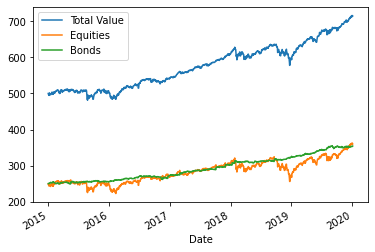

In [320]:
# Plot the Total value, value of equities, and value of bonds over the length of the timeframe

# This represents the performance of a portfolio with a 50% Equity-50% Bond allocation

portfolio_history[['Total Value', 'Equities','Bonds']].plot()

In [312]:
portfolio_history

,Total Value,Equities,Bonds
Date,,,
2015-01-01,500.000000,250.000000,250.000000
2015-01-01,500.000000,250.000000,250.000000
2015-01-02,500.000000,250.000000,250.000000
2015-01-03,496.333702,245.607749,250.725953
2015-01-04,496.333702,245.607749,250.725953
...,...,...,...
2020-01-01,715.957431,362.850082,353.107349
2020-01-02,715.957431,362.850082,353.107349
2020-01-03,714.568308,360.199411,354.368897


## 2. Compare Different Allocation Rates

In [295]:
# Create an empty DataFrame for different allocation rates

allocation_df = pd.DataFrame()

# Create an empty DataFrame for different allocation ROI

allocation_roi_df = pd.DataFrame()

In [329]:
# Create a loop for different strategies (different allocation proportions)

# This is largely the same as above, however, the strat (strategy) will change in each iteration

ini_amount = 500
 
for i in range(0,105,5):
    strat = port.Strategy(i,100-i,0,1) 
    
    portfolio = port.Portfolio(shares_dict)

    portfolio.initial_buy(ini_amount, strat, start_date)
    
    time_period = pd.date_range(pd.to_datetime(start_date),pd.to_datetime(end_date))

    for day in time_period:
        portfolio.reinvest_divs(day)
        portfolio.get_asset_values(day)
        if portfolio.asset_split['Equities'] > strat.equity_distribution+strat.threshold:
            sell_amt = (portfolio.asset_values['Equities']+portfolio.asset_values['Bonds'])*((portfolio.asset_split['Equities']-strat.equity_distribution)/100)
            sell_amt_per = sell_amt/len(portfolio.equities)
            for share in portfolio.equities: # sell equities and buy more bonds
                portfolio.sell(share, sell_amt_per, day)
            for share in portfolio.bonds:
                portfolio.buy(share, sell_amt_per, day)

        if portfolio.asset_split['Bonds'] > strat.bond_distribution+strat.threshold:
            sell_amt = (portfolio.asset_values['Equities']+portfolio.asset_values['Bonds'])*(portfolio.asset_split['Bonds']-strat.bond_distribution)
            sell_amt_per = sell_amt/len(portfolio.bonds)
            for share in portfolio.bonds: # sell bonds and buy more equities
                portfolio.sell(share, sell_amt_per, day)
            for share in portfolio.bonds:
                portfolio.buy(share, sell_amt_per, day)
    portfolio_history = portfolio.get_hist_df()
    portfolio_history['Date'] = pd.to_datetime(portfolio_history['Date']) # Convert date to datetime object
    portfolio_history.set_index('Date', inplace = True) 
    
    # Create a new column of the allocation dataframe based on the total value of the most recent portfolio simulation
    allocation_df[str(i)+'% Equities:'+str(100-i)+'% Bonds'] = portfolio_history['Total Value']
    
    # Loop through each year to calculate a ROI in each year 
    
    portfolio_history['Year'] = portfolio_history.index.strftime('%Y')
    
    years = list(portfolio_history['Year'].unique())
    
    for year in years:
        subset = portfolio_history[portfolio_history['Year']==year]
        allocation_roi_df.at[year,str(i)+'% Equities:'+str(100-i)+'% Bonds'] = ((subset['Total Value'].iat[-1]/subset['Total Value'].iat[0])-1)*100
    allocation_roi_df.at['Period Total',str(i)+'% Equities:'+str(100-i)+'% Bonds'] = ((portfolio_history['Total Value'].iat[-1]/portfolio_history['Total Value'].iat[0])-1)*100

    
 

<AxesSubplot:xlabel='Date'>

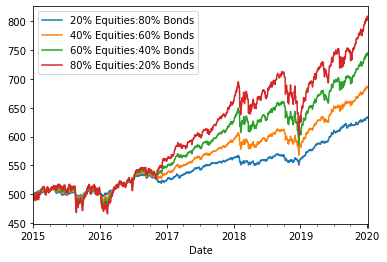

In [330]:
allocation_df[['20% Equities:80% Bonds','40% Equities:60% Bonds','60% Equities:40% Bonds','80% Equities:20% Bonds']].plot()

In [331]:
allocation_roi_df

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,55% Equities:45% Bonds,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds
2015,0.218626,0.273435,0.328244,0.383053,0.437862,0.492671,0.584348,0.636731,0.689152,0.741940,...,0.851559,0.908389,0.965585,1.028476,1.040762,1.095572,1.150381,1.205190,1.259999,1.314808
2016,2.587218,3.184265,3.786813,4.348741,4.929391,5.520848,6.043585,6.629010,7.222337,7.818013,...,9.014540,9.615362,10.227456,10.822423,11.506959,12.112548,12.729853,13.371337,13.959125,14.559289
2017,3.691745,4.613491,5.444126,6.325657,7.175629,8.036254,8.918145,9.803572,10.686046,11.585973,...,13.397852,14.309808,15.235800,16.168599,17.096929,18.065387,19.012808,19.950952,20.963172,21.816969
2018,0.399563,0.098906,-0.073633,-0.341283,-0.458312,-0.708085,-1.070154,-1.279104,-1.622218,-1.895153,...,-2.454619,-2.741172,-3.049134,-3.278649,-3.636598,-3.938433,-4.232325,-4.502496,-4.926519,-5.198723
2019,8.615056,9.752188,10.650205,11.685000,12.552129,13.576834,14.758023,15.754691,16.930999,18.034645,...,20.287908,21.438156,22.636861,23.738357,25.025217,26.239241,27.467102,28.669020,30.088455,31.252157
2020,0.357270,0.301886,0.240486,0.194103,0.135325,0.080188,0.028791,-0.033622,-0.082840,-0.137380,...,-0.246149,-0.300378,-0.354503,-0.404179,-0.460475,-0.512957,-0.576525,-0.626441,-0.684159,-0.730514
Period Total,17.000328,19.566755,21.955314,24.430453,26.896683,29.435010,32.037200,34.667888,37.361456,40.117462,...,45.777220,48.682505,51.676951,54.714501,57.797106,60.967322,64.155941,67.426343,70.757296,73.854972


## 3. Analyse Volatility

In [332]:
allocation_df.head(5)

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,55% Equities:45% Bonds,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.00000,500.000000,500.000000
2015-01-02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.00000,500.000000,500.000000
2015-01-03,501.451906,500.940085,500.428265,499.916445,499.404624,498.892804,498.380984,497.869163,497.357343,496.845523,...,495.821882,495.310062,494.798241,494.286421,493.774601,493.26278,492.75096,492.23914,491.727319,491.215499
2015-01-04,501.451906,500.940085,500.428265,499.916445,499.404624,498.892804,498.380984,497.869163,497.357343,496.845523,...,495.821882,495.310062,494.798241,494.286421,493.774601,493.26278,492.75096,492.23914,491.727319,491.215499
2015-01-05,501.451906,500.940085,500.428265,499.916445,499.404624,498.892804,498.380984,497.869163,497.357343,496.845523,...,495.821882,495.310062,494.798241,494.286421,493.774601,493.26278,492.75096,492.23914,491.727319,491.215499


In [333]:
# Remove duplicate values -- Duplicates are created on non-market trading days where the next value is returned

allocation_df = allocation_df.drop_duplicates(keep='first').sort_index()

In [334]:
# Create an empty DataFrame for reporting the daily change in each strategy

daily_change_df = pd.DataFrame(index = allocation_df.index[1:])

In [335]:
# Create a function to return daily change
def daily_rate(prev, curr):
    return(((curr-prev)/prev)*100)

for column in allocation_df.columns:
    daily_change_df[column] = 0.0 # Initialise the column
    val_array = np.array(allocation_df[column])
    daily_change_array = np.array(daily_change_df[column])
    for i in range(1,len(val_array)):
         daily_change_array[i-1] = daily_rate(val_array[i-1],val_array[i])
    daily_change_df[column] = daily_change_array
    

In [336]:
daily_change_df.head()

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,55% Equities:45% Bonds,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,0.290381,0.188017,0.085653,-0.016711,-0.119075,-0.221439,-0.323803,-0.426167,-0.528531,-0.630895,...,-0.835624,-0.937988,-1.040352,-1.142716,-1.245080,-1.347444,-1.449808,-1.552172,-1.654536,-1.756900
2015-01-06,0.289540,0.227134,0.164599,0.101937,0.039146,-0.023774,-0.086823,-0.150002,-0.213311,-0.276750,...,-0.404021,-0.467854,-0.531819,-0.595916,-0.660146,-0.724510,-0.789007,-0.853639,-0.918405,-0.983305
2015-01-07,0.060147,0.117757,0.175557,0.233547,0.291730,0.350105,0.408674,0.467437,0.526396,0.585552,...,0.704457,0.764208,0.824160,0.884313,0.944669,1.005228,1.065992,1.126962,1.188138,1.249523
2015-01-08,-0.156288,-0.062573,0.031342,0.125458,0.219775,0.314296,0.409019,0.503946,0.599078,0.694414,...,0.885706,0.981661,1.077825,1.174197,1.270778,1.367569,1.464570,1.561783,1.659207,1.756844
2015-01-09,0.168573,0.118166,0.067745,0.017311,-0.033136,-0.083595,-0.134069,-0.184555,-0.235054,-0.285567,...,-0.386631,-0.437183,-0.487748,-0.538326,-0.588917,-0.639522,-0.690140,-0.740770,-0.791415,-0.842072


In [337]:
# Create a new dataframe for the standard deviation by year/strategy

std_df = pd.DataFrame(columns =daily_change_df.columns)

In [338]:
daily_change_df.head()

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,55% Equities:45% Bonds,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,0.290381,0.188017,0.085653,-0.016711,-0.119075,-0.221439,-0.323803,-0.426167,-0.528531,-0.630895,...,-0.835624,-0.937988,-1.040352,-1.142716,-1.245080,-1.347444,-1.449808,-1.552172,-1.654536,-1.756900
2015-01-06,0.289540,0.227134,0.164599,0.101937,0.039146,-0.023774,-0.086823,-0.150002,-0.213311,-0.276750,...,-0.404021,-0.467854,-0.531819,-0.595916,-0.660146,-0.724510,-0.789007,-0.853639,-0.918405,-0.983305
2015-01-07,0.060147,0.117757,0.175557,0.233547,0.291730,0.350105,0.408674,0.467437,0.526396,0.585552,...,0.704457,0.764208,0.824160,0.884313,0.944669,1.005228,1.065992,1.126962,1.188138,1.249523
2015-01-08,-0.156288,-0.062573,0.031342,0.125458,0.219775,0.314296,0.409019,0.503946,0.599078,0.694414,...,0.885706,0.981661,1.077825,1.174197,1.270778,1.367569,1.464570,1.561783,1.659207,1.756844
2015-01-09,0.168573,0.118166,0.067745,0.017311,-0.033136,-0.083595,-0.134069,-0.184555,-0.235054,-0.285567,...,-0.386631,-0.437183,-0.487748,-0.538326,-0.588917,-0.639522,-0.690140,-0.740770,-0.791415,-0.842072


In [340]:
daily_change_df['Year'] = daily_change_df.index.strftime('%Y')
    
years = list(daily_change_df['Year'].unique())

for column in std_df.columns:
    for year in years:
        subset = daily_change_df[(daily_change_df['Year']==year)]
        std_df.at[year,column] = subset[column].std()
    std_df.at['Period Total',column] = daily_change_df[column].std()

In [341]:
std_df

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,55% Equities:45% Bonds,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds
2015,0.234589,0.21526,0.207329,0.212118,0.228872,0.25528,0.283388,0.321118,0.362293,0.406258,...,0.499034,0.547033,0.596186,0.645353,0.703231,0.753747,0.80462,0.855803,0.90726,0.958962
2016,0.208478,0.194907,0.190318,0.19532,0.209329,0.230621,0.252087,0.282273,0.315758,0.35161,...,0.427775,0.46738,0.507916,0.548625,0.59894,0.641247,0.683829,0.726826,0.77009,0.813508
2017,0.182667,0.167462,0.157645,0.150515,0.147122,0.147828,0.153019,0.161752,0.173451,0.187949,...,0.222522,0.241768,0.262103,0.282984,0.303592,0.327333,0.348442,0.372227,0.396615,0.416784
2018,0.170673,0.161759,0.169248,0.191606,0.221665,0.259796,0.308381,0.351423,0.404219,0.45425,...,0.557155,0.609673,0.659166,0.714389,0.767396,0.822285,0.877681,0.937097,0.994762,1.04641
2019,0.21581,0.192698,0.181799,0.177992,0.182492,0.195965,0.220128,0.245622,0.280068,0.314685,...,0.389744,0.42931,0.471063,0.509137,0.554357,0.596945,0.639999,0.682025,0.731451,0.771777
2020,0.159876,0.0937402,0.0203979,0.0405363,0.105277,0.171199,0.23267,0.307337,0.366238,0.431527,...,0.561792,0.626768,0.69164,0.756651,0.81871,0.887365,0.957954,1.01787,1.08718,1.14286
Period Total,0.203879,0.187722,0.182482,0.187218,0.200798,0.222607,0.25018,0.281187,0.318097,0.35579,...,0.435559,0.476962,0.518548,0.561026,0.608102,0.652235,0.696461,0.741923,0.788509,0.831527


In [342]:
# Calculate volatility as the standard deviation of the daily movement

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:label='b2dd89ad-8fcb-49c9-94a8-125991bf3221'>

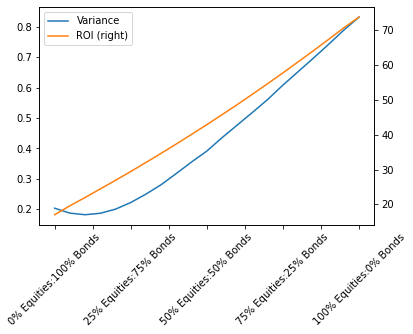

In [343]:

x = pd.Series(std_df.loc['Period Total'], name = 'Variance')

y = pd.Series(allocation_roi_df.loc['Period Total'], name = 'ROI')

x.plot(legend = True)
y.plot( rot = 45, secondary_y= True, legend = True)

In [344]:
# Interesting - This suggests that there is a point where volatility decreases while the total return increases during the time period sampled. 

<AxesSubplot:xlabel='Date'>

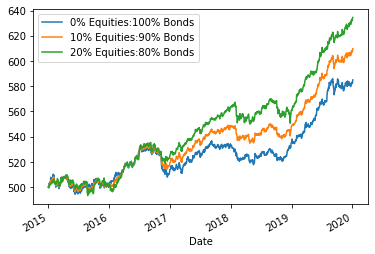

In [345]:
allocation_df[['0% Equities:100% Bonds','10% Equities:90% Bonds','20% Equities:80% Bonds']].plot()

In [346]:
len(daily_change_df[(daily_change_df['0% Equities:100% Bonds']>.1) | ((daily_change_df['0% Equities:100% Bonds']<-.1))])

775

In [347]:
len(daily_change_df[(daily_change_df['0% Equities:100% Bonds']>.5) | ((daily_change_df['0% Equities:100% Bonds']<-.5))])

30

In [348]:
len(daily_change_df[(daily_change_df['10% Equities:90% Bonds']>.5) | ((daily_change_df['10% Equities:90% Bonds']<-.5))])

16

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:label='44b6f8c0-90d8-4ce4-a706-5b43123cf91e'>

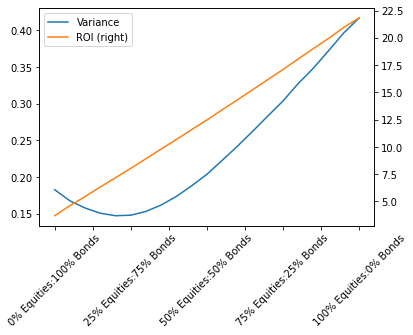

In [349]:

x = pd.Series(std_df.loc['2017'], name = 'Variance')

y = pd.Series(allocation_roi_df.loc['2017'], name = 'ROI')

x.plot(legend = True)
y.plot( rot = 45, secondary_y= True, legend = True)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:label='5f3428a2-95bb-4c3f-8be2-424be2b3ec1d'>

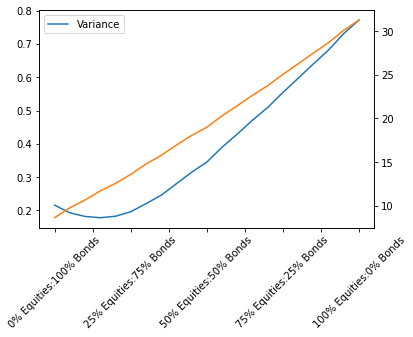

In [350]:
pd.Series(std_df.loc['2019'], name = 'Variance').plot(legend = True)
pd.Series(allocation_roi_df.loc['2019'], name = 'ROI').plot( rot = 45, secondary_y= True)

In [351]:
# Calculate the covariance between the ETFs

In [352]:
daily_change_df.head()

,0% Equities:100% Bonds,5% Equities:95% Bonds,10% Equities:90% Bonds,15% Equities:85% Bonds,20% Equities:80% Bonds,25% Equities:75% Bonds,30% Equities:70% Bonds,35% Equities:65% Bonds,40% Equities:60% Bonds,45% Equities:55% Bonds,...,60% Equities:40% Bonds,65% Equities:35% Bonds,70% Equities:30% Bonds,75% Equities:25% Bonds,80% Equities:20% Bonds,85% Equities:15% Bonds,90% Equities:10% Bonds,95% Equities:5% Bonds,100% Equities:0% Bonds,Year
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,0.290381,0.188017,0.085653,-0.016711,-0.119075,-0.221439,-0.323803,-0.426167,-0.528531,-0.630895,...,-0.937988,-1.040352,-1.142716,-1.245080,-1.347444,-1.449808,-1.552172,-1.654536,-1.756900,2015
2015-01-06,0.289540,0.227134,0.164599,0.101937,0.039146,-0.023774,-0.086823,-0.150002,-0.213311,-0.276750,...,-0.467854,-0.531819,-0.595916,-0.660146,-0.724510,-0.789007,-0.853639,-0.918405,-0.983305,2015
2015-01-07,0.060147,0.117757,0.175557,0.233547,0.291730,0.350105,0.408674,0.467437,0.526396,0.585552,...,0.764208,0.824160,0.884313,0.944669,1.005228,1.065992,1.126962,1.188138,1.249523,2015
2015-01-08,-0.156288,-0.062573,0.031342,0.125458,0.219775,0.314296,0.409019,0.503946,0.599078,0.694414,...,0.981661,1.077825,1.174197,1.270778,1.367569,1.464570,1.561783,1.659207,1.756844,2015
2015-01-09,0.168573,0.118166,0.067745,0.017311,-0.033136,-0.083595,-0.134069,-0.184555,-0.235054,-0.285567,...,-0.437183,-0.487748,-0.538326,-0.588917,-0.639522,-0.690140,-0.740770,-0.791415,-0.842072,2015


In [353]:
 # Cov(x,y) = SUM [(xi - xm) * (yi - ym)] / (n - 1)

In [357]:
bond_array = np.array(daily_change_df['0% Equities:100% Bonds'])
equity_array = np.array(daily_change_df['100% Equities:0% Bonds'])

bond_mean = np.mean(bond_array)
equity_mean = np.mean(equity_array)

cov_sum =  0

for i in range(0,len(bond_array)):
    cov_sum += ((bond_array[i] - bond_mean)*(equity_array[i] - equity_mean))

cov = cov_sum/(len(bond_array)-1)
print('Covariance: '+str(cov))

Covariance: -0.03924580557374772


In [ ]:
# There is a small negative covariance between the two asset types
# This helps explain the decrease in variance with a 75:25 allocation

In [ ]:
# https://www.investopedia.com/terms/p/portfolio-variance.asp

In [ ]:
# Look for biggest monthly/weekly decrease in portfolio value

In [ ]:
## This is useful:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html